In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.4 MB/s eta 0:00:00


In [3]:
df = pd.read_csv('/content/indian_liver_patient.csv')
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
df.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [5]:
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [6]:
df=df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         579 non-null    int64  
 1   Gender                      579 non-null    object 
 2   Total_Bilirubin             579 non-null    float64
 3   Direct_Bilirubin            579 non-null    float64
 4   Alkaline_Phosphotase        579 non-null    int64  
 5   Alamine_Aminotransferase    579 non-null    int64  
 6   Aspartate_Aminotransferase  579 non-null    int64  
 7   Total_Protiens              579 non-null    float64
 8   Albumin                     579 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     579 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 54.3+ KB


In [8]:
#df['Dataset'] = np.where(df['Dataset'] == 2, 0, 1)
df['Dataset'] = df['Dataset'].map({2:0,1:1})

In [9]:
df=df.drop_duplicates()

In [10]:
df.Dataset.value_counts()

1    404
0    162
Name: Dataset, dtype: int64

<Axes: ylabel='count'>

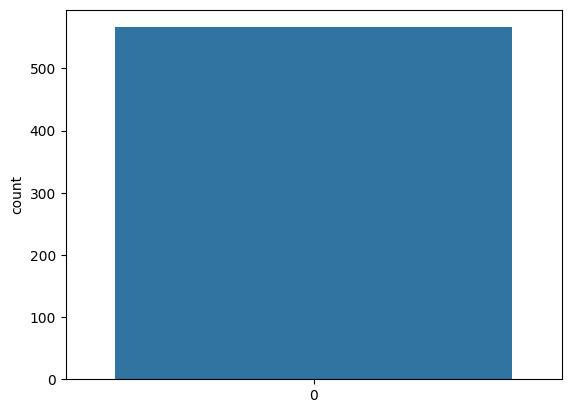

In [11]:
df.Dataset.value_counts()
sns.countplot(df['Dataset'])

In [12]:
df = pd.get_dummies(df,columns=['Gender'])

In [13]:
X=df.drop(['Dataset'],axis=1)
y=df['Dataset']

In [14]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

<Axes: title={'center': 'Correlation matrix'}>

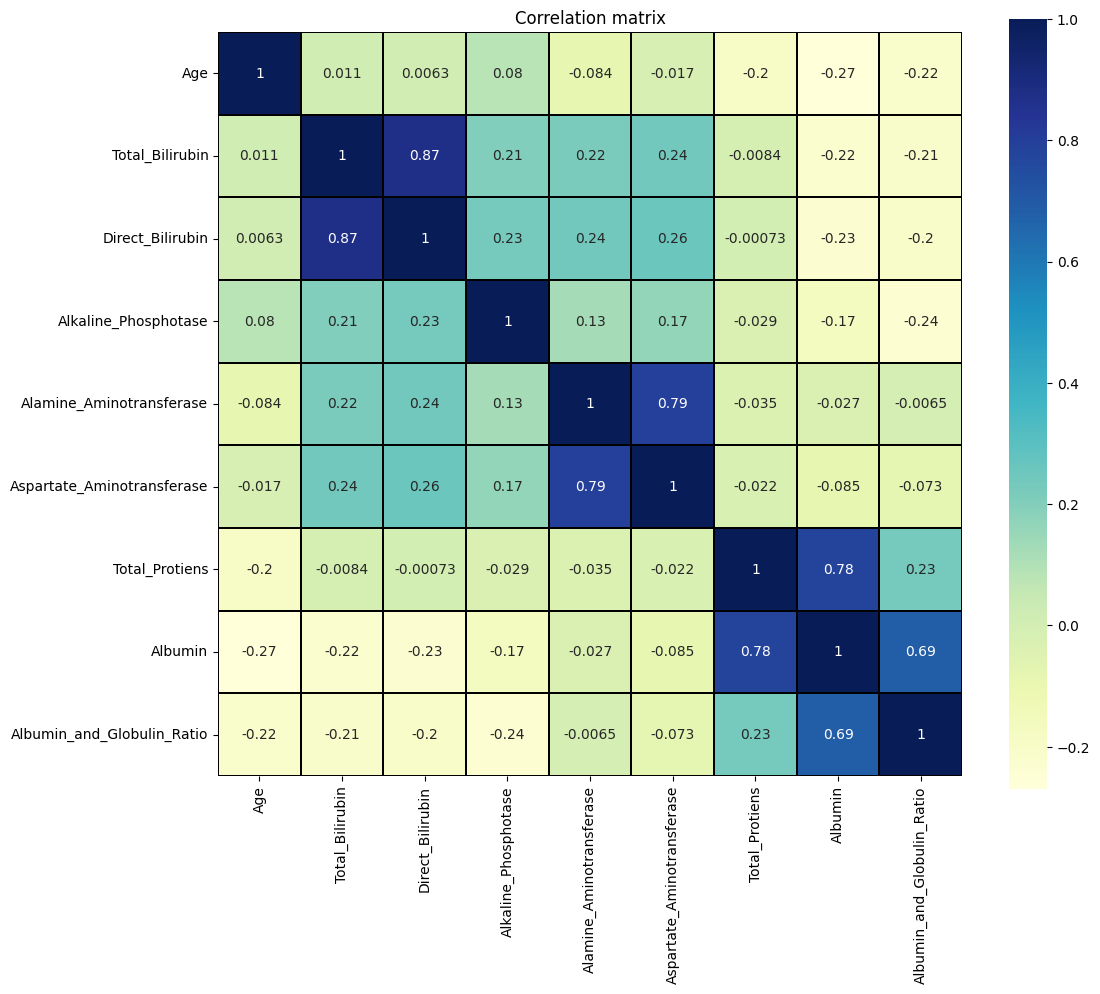

In [15]:
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Correlation matrix')
# Draw the heatmap using seaborn
sns.heatmap(df.drop(['Gender_Male','Gender_Female','Dataset'],axis=1).astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black',annot=True)

<Axes: >

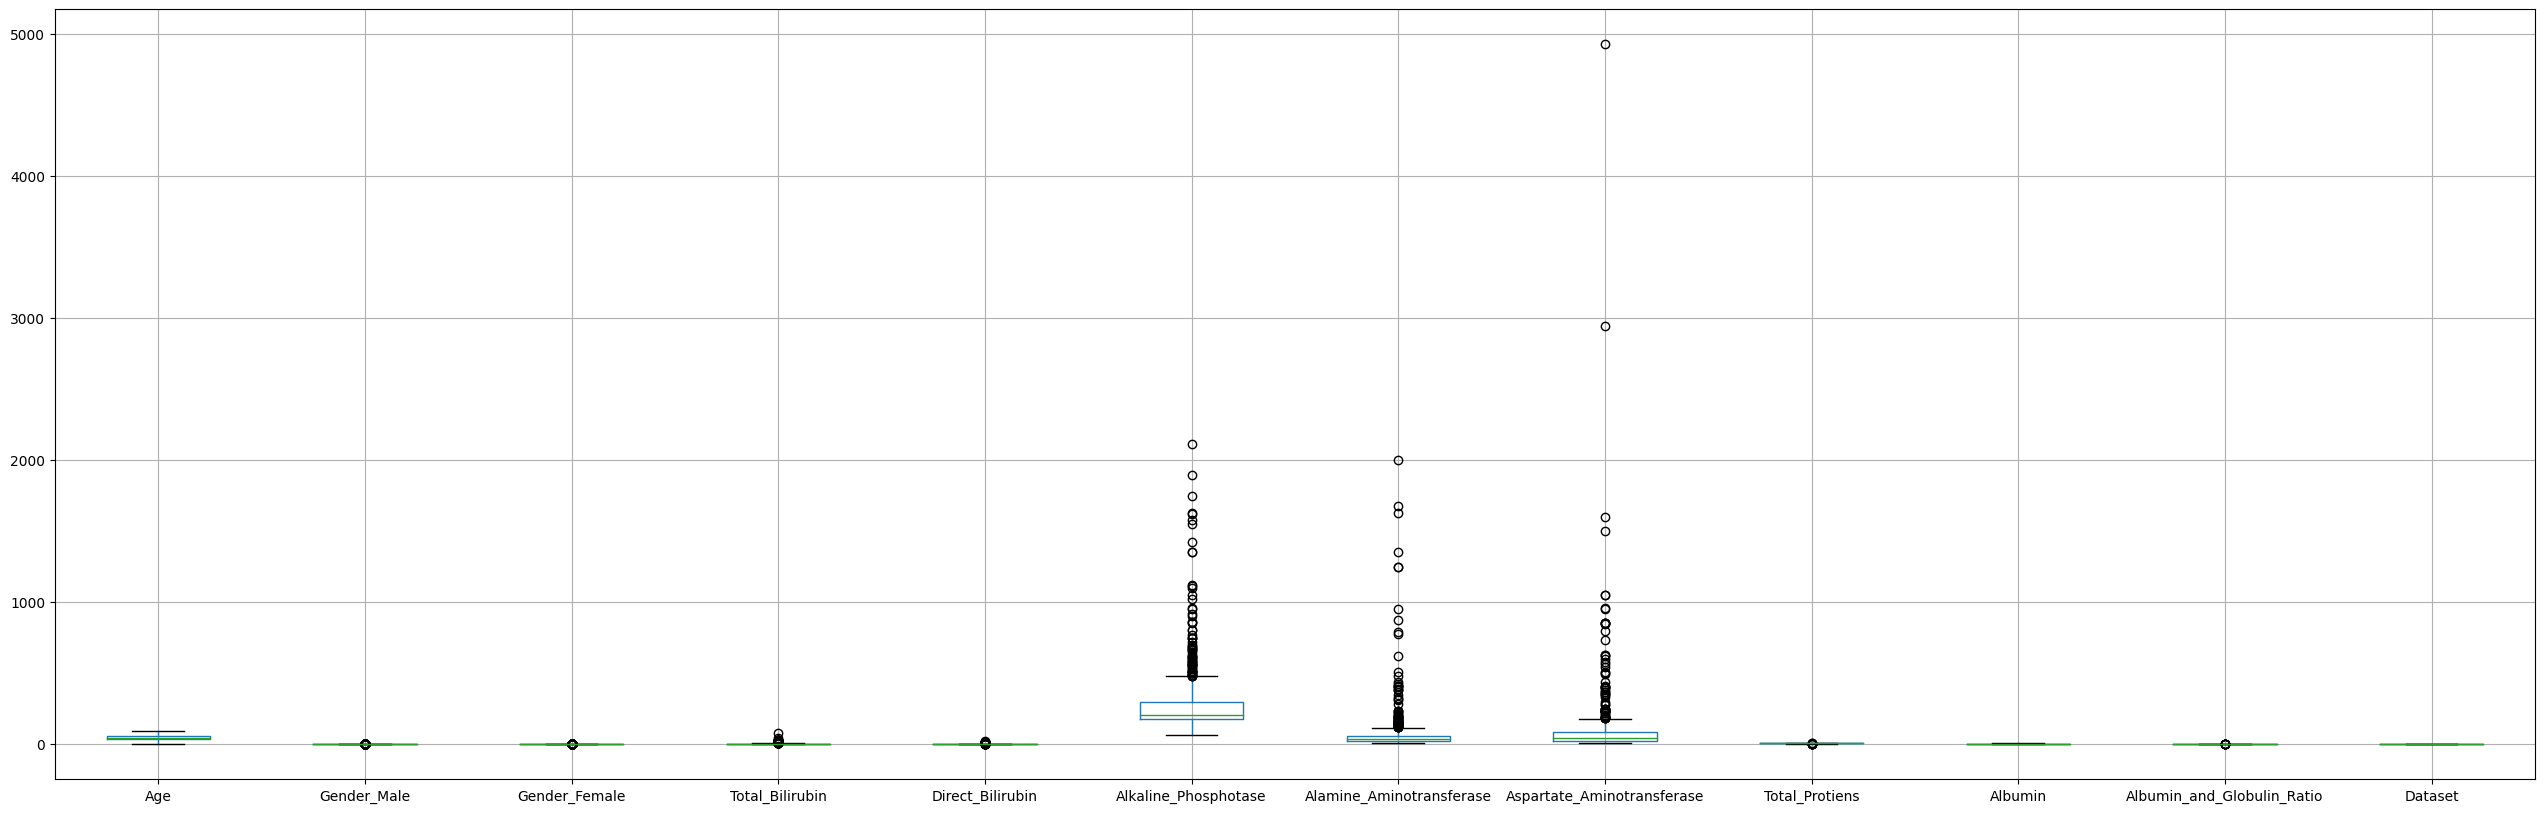

In [16]:
df.boxplot(column=['Age','Gender_Male','Gender_Female','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio','Dataset'],figsize=(32,10))

In [17]:
IQR=df['Age'].quantile(0.75)-df['Age'].quantile(0.25)
upperbound=df['Age'].quantile(0.75)+1.5*(IQR)
lowerbound=df['Age'].quantile(0.25)-1.5*(IQR)
print(upperbound,lowerbound)

95.5 -4.5


In [18]:
df.loc[df['Age']>95.5,'Age']=95.5
df.loc[df['Age']<-4.5,'Age']=0

In [19]:
IQR=df['Total_Bilirubin'].quantile(0.75)-df['Total_Bilirubin'].quantile(0.25)
upperbound=df['Total_Bilirubin'].quantile(0.75)+1.5*(IQR)
lowerbound=df['Total_Bilirubin'].quantile(0.25)-1.5*(IQR)
print(upperbound,lowerbound)

5.300000000000001 -1.9000000000000001


In [20]:
df.loc[df['Total_Bilirubin']>5.3,'Total_Bilirubin']=5.3
df.loc[df['Total_Bilirubin']<-1.9,'Total_Bilirubin']=0

In [21]:
IQR=df['Direct_Bilirubin'].quantile(0.75)-df['Direct_Bilirubin'].quantile(0.25)
upperbound=df['Direct_Bilirubin'].quantile(0.75)+1.5*(IQR)
lowerbound=df['Direct_Bilirubin'].quantile(0.25)-1.5*(IQR)
print(upperbound,lowerbound)

2.95 -1.4500000000000002


In [22]:
df.loc[df['Direct_Bilirubin']>2.95,'Direct_Bilirubin']=2.95
df.loc[df['Direct_Bilirubin']<-1.45,'Direct_Bilirubin']=0

In [23]:
IQR=df['Alkaline_Phosphotase'].quantile(0.75)-df['Alkaline_Phosphotase'].quantile(0.25)
upperbound=df['Alkaline_Phosphotase'].quantile(0.75)+1.5*(IQR)
lowerbound=df['Alkaline_Phosphotase'].quantile(0.25)-1.5*(IQR)
print(upperbound,lowerbound)

481.0 -7.0


In [24]:
df.loc[df['Alkaline_Phosphotase']>481,'Alkaline_Phosphotase']=481
df.loc[df['Alkaline_Phosphotase']<-7,'Alkaline_Phosphotase']=0

In [25]:
IQR=df['Alamine_Aminotransferase'].quantile(0.75)-df['Alamine_Aminotransferase'].quantile(0.25)
upperbound=df['Alamine_Aminotransferase'].quantile(0.75)+1.5*(IQR)
lowerbound=df['Alamine_Aminotransferase'].quantile(0.25)-1.5*(IQR)
print(upperbound,lowerbound)

117.375 -33.625


In [26]:
df.loc[df['Alamine_Aminotransferase']>117.375,'Alamine_Aminotransferase']=117.375
df.loc[df['Alamine_Aminotransferase']<-33.625,'Alamine_Aminotransferase']=0

In [27]:
IQR=df['Aspartate_Aminotransferase'].quantile(0.75)-df['Aspartate_Aminotransferase'].quantile(0.25)
upperbound=df['Aspartate_Aminotransferase'].quantile(0.75)+1.5*(IQR)
lowerbound=df['Aspartate_Aminotransferase'].quantile(0.25)-1.5*(IQR)
print(upperbound,lowerbound)

180.0 -68.0


In [28]:
df.loc[df['Aspartate_Aminotransferase']>180,'Aspartate_Aminotransferase']=180
df.loc[df['Aspartate_Aminotransferase']<-68,'Aspartate_Aminotransferase']=0

In [29]:
IQR=df['Total_Protiens'].quantile(0.75)-df['Total_Protiens'].quantile(0.25)
upperbound=df['Total_Protiens'].quantile(0.75)+1.5*(IQR)
lowerbound=df['Total_Protiens'].quantile(0.25)-1.5*(IQR)
print(upperbound,lowerbound)

9.3 3.6999999999999993


In [30]:
df.loc[df['Total_Protiens']>9.3,'Total_Protiens']=9.3
df.loc[df['Total_Protiens']<3.7,'Total_Protiens']=3.7

In [31]:
IQR=df['Albumin'].quantile(0.75)-df['Albumin'].quantile(0.25)
upperbound=df['Albumin'].quantile(0.75)+1.5*(IQR)
lowerbound=df['Albumin'].quantile(0.25)-1.5*(IQR)
print(upperbound,lowerbound)

5.6 0.8000000000000005


In [32]:
df.loc[df['Albumin']>5.6,'Albumin']=5.6
df.loc[df['Albumin']<0.8,'Albumin']=0.8

In [33]:
IQR=df['Albumin_and_Globulin_Ratio'].quantile(0.75)-df['Albumin_and_Globulin_Ratio'].quantile(0.25)
upperbound=df['Albumin_and_Globulin_Ratio'].quantile(0.75)+1.5*(IQR)
lowerbound=df['Albumin_and_Globulin_Ratio'].quantile(0.25)-1.5*(IQR)
print(upperbound,lowerbound)

1.7000000000000002 0.09999999999999976


In [34]:
df.loc[df['Albumin_and_Globulin_Ratio']>1.7,'Albumin_and_Globulin_Ratio']=1.7
df.loc[df['Albumin_and_Globulin_Ratio']<0.1,'Albumin_and_Globulin_Ratio']=0.1

<Axes: >

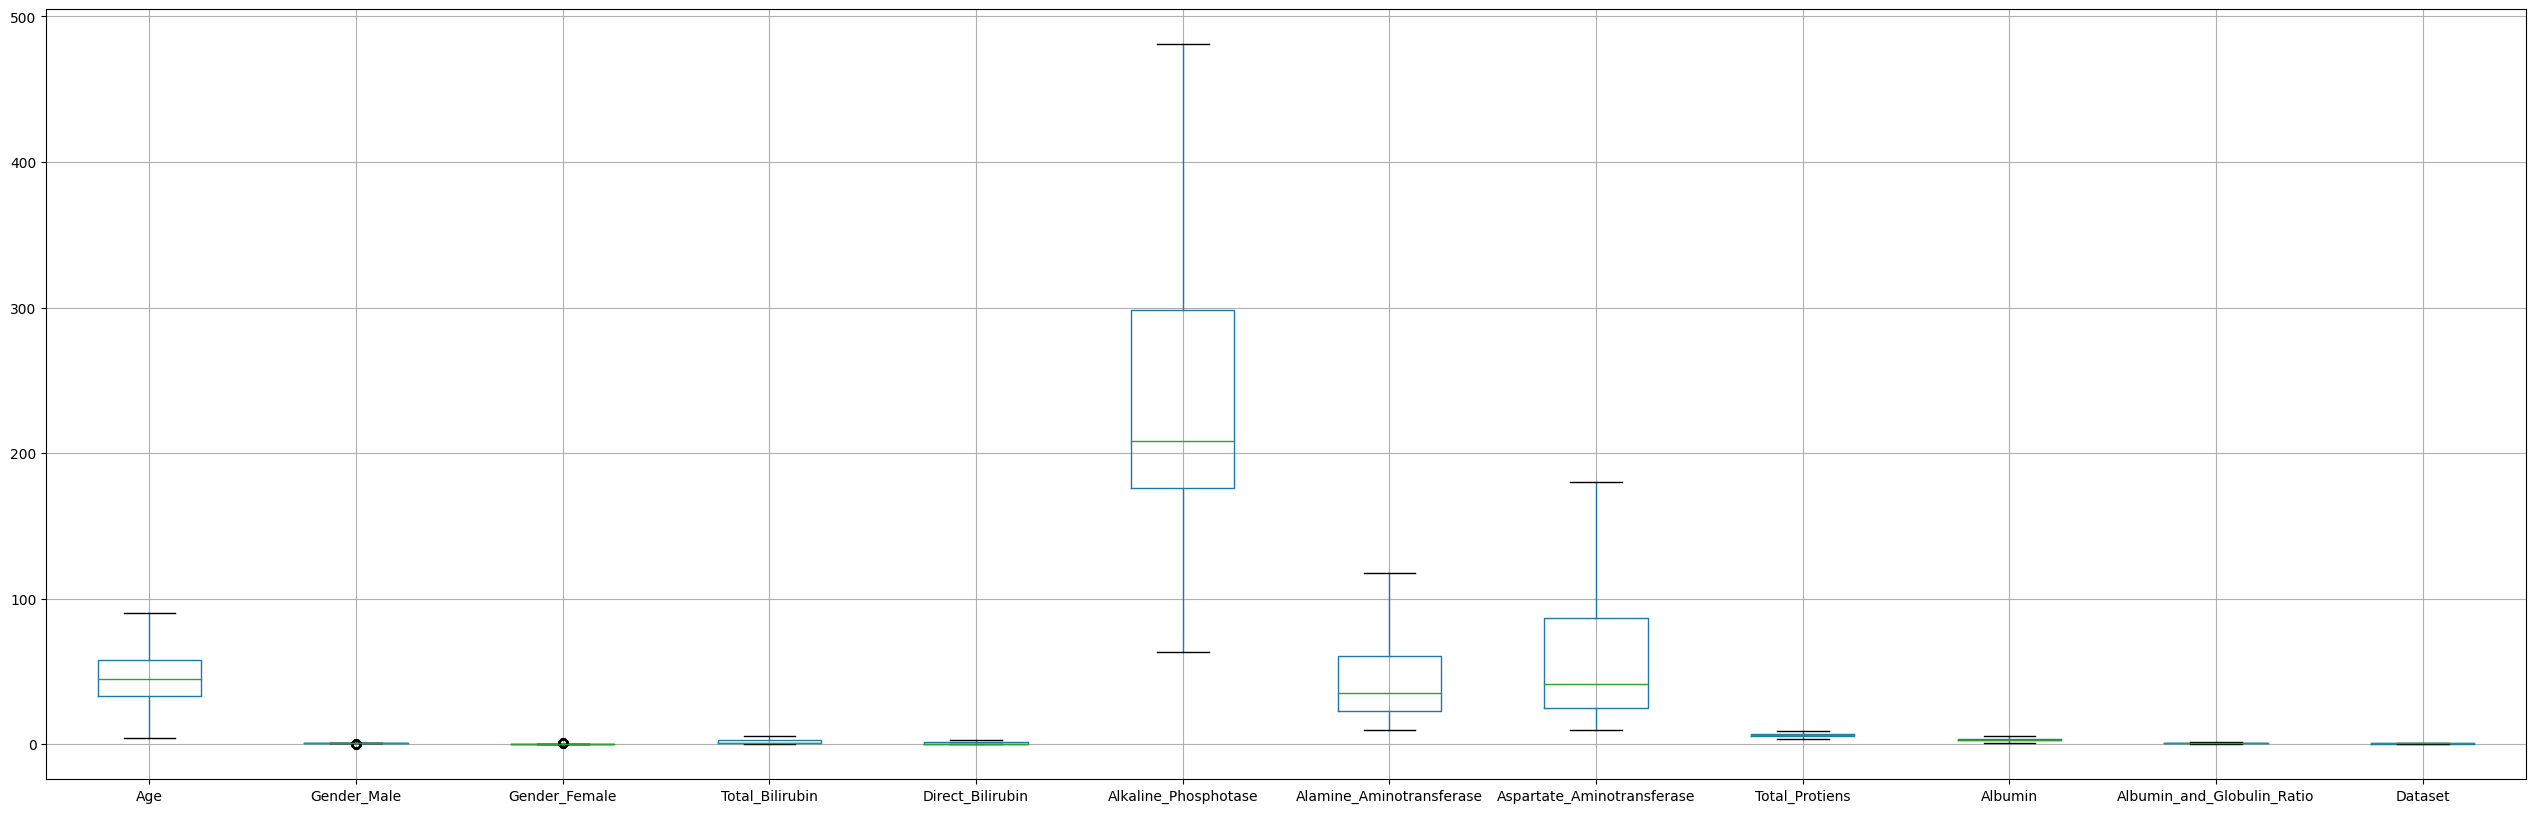

In [35]:
df.boxplot(column=['Age','Gender_Male','Gender_Female','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio','Dataset'],figsize=(32,10))

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df.drop(['Gender_Male','Gender_Female','Dataset'],axis=1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,7.984756,Age
1,68.156309,Total_Bilirubin
2,51.248626,Direct_Bilirubin
3,7.875425,Alkaline_Phosphotase
4,9.018998,Alamine_Aminotransferase
5,7.557496,Aspartate_Aminotransferase
6,123.800267,Total_Protiens
7,173.946915,Albumin
8,37.079489,Albumin_and_Globulin_Ratio


In [37]:
#X=df.drop(['Dataset','Gender_Male','Gender_Female','Albumin','Total_Protiens','Total_Bilirubin'],axis=1)
X = df[['Albumin','Alamine_Aminotransferase','Aspartate_Aminotransferase','Alkaline_Phosphotase','Total_Bilirubin']]
from sklearn import metrics
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [38]:
from imblearn.combine import SMOTEENN
smote=SMOTEENN()
X_resample,y_resample = smote.fit_resample(X,y)
X_train_smote,X_test_smote,y_train_smote,y_test_smote=train_test_split(X_resample,y_resample, test_size=0.2, random_state=2)
from collections import Counter
print("Before SMOTE: ",Counter(y_train))
print("After SMOTE: ",Counter(y_train_smote))

Before SMOTE:  Counter({1: 323, 0: 129})
After SMOTE:  Counter({0: 181, 1: 140})


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [50, 100, 200]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 30, num = 5)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,

               'max_features': max_features,

               'max_depth': max_depth,

               'min_samples_split': min_samples_split,

               'min_samples_leaf': min_samples_leaf,

               'bootstrap': bootstrap}
model = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 3, cv =3, verbose=2, random_state=2)
rf_random.fit(X_train_smote, y_train_smote)
parameters = rf_random.best_params_
print(parameters)


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


{'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False}


In [40]:
model = RandomForestClassifier(n_estimators= 200,min_samples_split=5, min_samples_leaf=2, max_features='sqrt', max_depth=10, bootstrap=False)
model.fit(X_train_smote, y_train_smote)
y_pred = model.predict(X_test_smote)
y_pred_train = model.predict(X_train_smote)
print(metrics.classification_report(y_test_smote,y_pred,labels=[0,1]))
#print("Training accuracy",metrics.accuracy_score(y_train_smote,y_pred_train))
print("Testing accuracy:",metrics.accuracy_score(y_test_smote,y_pred))


              precision    recall  f1-score   support

           0       0.96      0.96      0.96        46
           1       0.94      0.94      0.94        35

    accuracy                           0.95        81
   macro avg       0.95      0.95      0.95        81
weighted avg       0.95      0.95      0.95        81

Testing accuracy: 0.9506172839506173


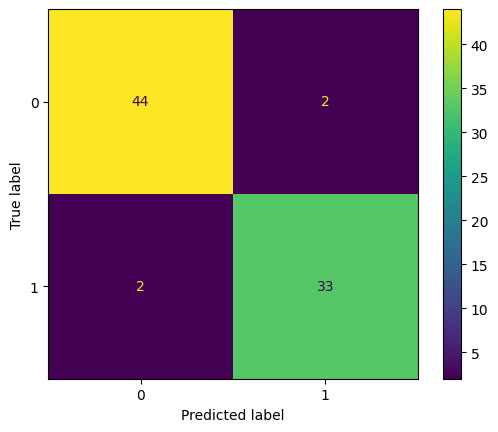

In [41]:
from sklearn import metrics
actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)
confusion_matrix = metrics.confusion_matrix(y_test_smote,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

In [42]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train_smote, y_train_smote)
y_pred = model.predict(X_test_smote)
y_pred_train = model.predict(X_train_smote)
print(metrics.classification_report(y_test_smote,y_pred,labels=[0,1]))
#print("Training accuracy",metrics.accuracy_score(y_train_smote,y_pred_train))
print("Testing accuracy:",metrics.accuracy_score(y_test_smote,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        46
           1       1.00      0.94      0.97        35

    accuracy                           0.98        81
   macro avg       0.98      0.97      0.97        81
weighted avg       0.98      0.98      0.98        81

Testing accuracy: 0.9753086419753086


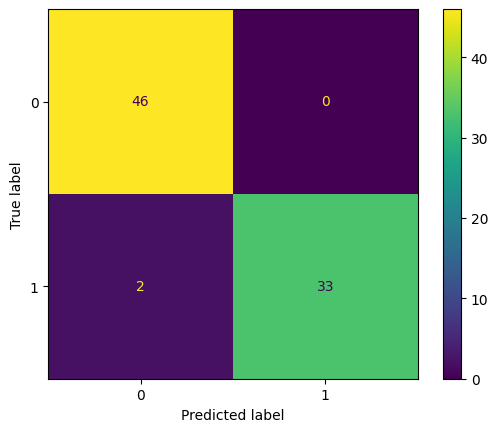

In [43]:
from sklearn import metrics
actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)
confusion_matrix = metrics.confusion_matrix(y_test_smote,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

In [44]:
from sklearn import svm
model = svm.SVC(gamma='scale', probability=True)
model.fit(X_train_smote,y_train_smote)
y_pred = model.predict(X_test_smote)
y_pred_train = model.predict(X_train_smote)
print(metrics.classification_report(y_test_smote,y_pred,labels=[0,1]))
#print("Training accuracy",metrics.accuracy_score(y_train_smote,y_pred_train))
print("Testing accuracy:",metrics.accuracy_score(y_test_smote,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.89        46
           1       0.90      0.77      0.83        35

    accuracy                           0.86        81
   macro avg       0.87      0.85      0.86        81
weighted avg       0.87      0.86      0.86        81

Testing accuracy: 0.8641975308641975


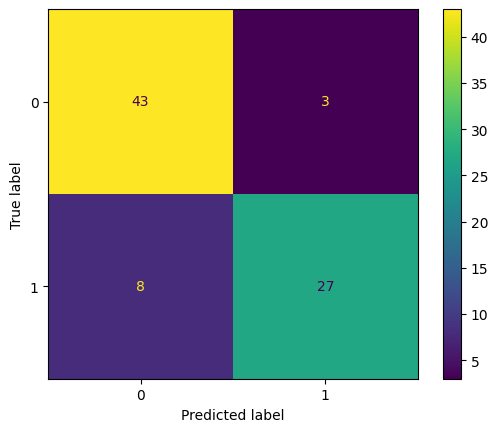

In [45]:
from sklearn import metrics
actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)
confusion_matrix = metrics.confusion_matrix(y_test_smote,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

In [46]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train_smote,y_train_smote)
y_pred = model.predict(X_test_smote)
y_pred_train = model.predict(X_train_smote)
print(metrics.classification_report(y_test_smote,y_pred,labels=[0,1]))
#print("Training accuracy",metrics.accuracy_score(y_train_smote,y_pred_train))
print("Testing accuracy:",metrics.accuracy_score(y_test_smote,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        46
           1       0.84      0.91      0.88        35

    accuracy                           0.89        81
   macro avg       0.89      0.89      0.89        81
weighted avg       0.89      0.89      0.89        81

Testing accuracy: 0.8888888888888888


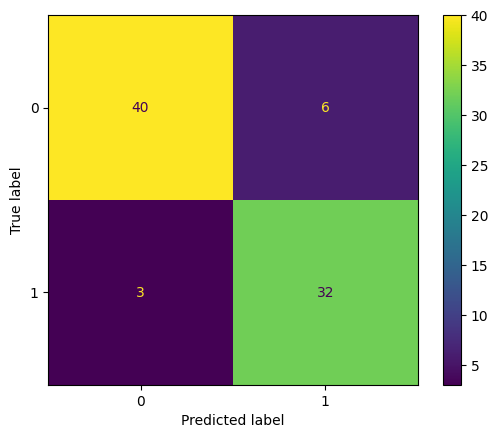

In [47]:
from sklearn import metrics
actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)
confusion_matrix = metrics.confusion_matrix(y_test_smote,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

In [48]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train_smote,y_train_smote)
y_pred = model.predict(X_test_smote)
y_pred_train = model.predict(X_train_smote)
print(metrics.classification_report(y_test_smote,y_pred,labels=[0,1]))
#print("Training accuracy",metrics.accuracy_score(y_train_smote,y_pred_train))
print("Testing accuracy:",metrics.accuracy_score(y_test_smote,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91        46
           1       0.91      0.83      0.87        35

    accuracy                           0.89        81
   macro avg       0.89      0.88      0.89        81
weighted avg       0.89      0.89      0.89        81

Testing accuracy: 0.8888888888888888


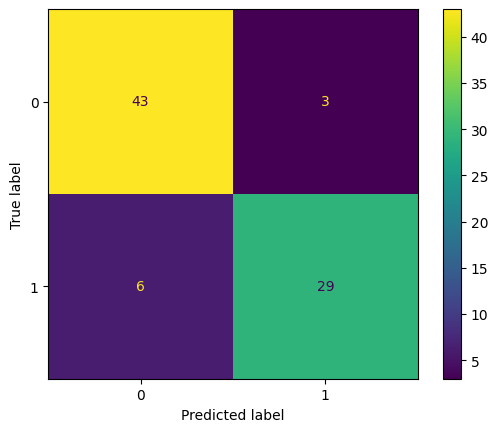

In [49]:
from sklearn import metrics
actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)
confusion_matrix = metrics.confusion_matrix(y_test_smote,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

In [50]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(X_train_smote,y_train_smote)
y_pred = model.predict(X_test_smote)
y_pred_train = model.predict(X_train_smote)
print(metrics.classification_report(y_test_smote,y_pred,labels=[0,1]))
#print("Training accuracy",metrics.accuracy_score(y_train_smote,y_pred_train))
print("Testing accuracy:",metrics.accuracy_score(y_test_smote,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91        46
           1       0.91      0.83      0.87        35

    accuracy                           0.89        81
   macro avg       0.89      0.88      0.89        81
weighted avg       0.89      0.89      0.89        81

Testing accuracy: 0.8888888888888888


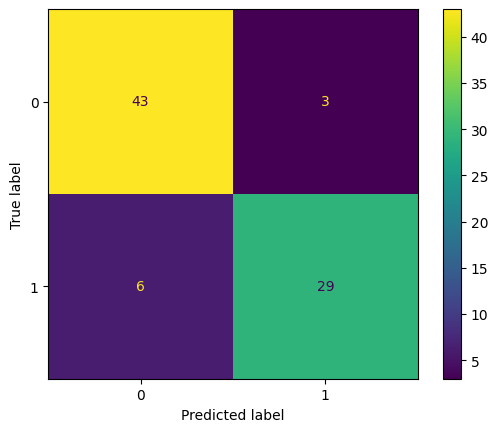

In [51]:
from sklearn import metrics
actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)
confusion_matrix = metrics.confusion_matrix(y_test_smote,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

In [52]:
import lightgbm as lgb
model = lgb.LGBMClassifier()
model.fit(X_train_smote,y_train_smote)
y_pred = model.predict(X_test_smote)
y_pred_train = model.predict(X_train_smote)
print(metrics.classification_report(y_test_smote,y_pred,labels=[0,1]))
#print("Training accuracy",metrics.accuracy_score(y_train_smote,y_pred_train))
print("Testing accuracy:",metrics.accuracy_score(y_test_smote,y_pred))

[LightGBM] [Info] Number of positive: 140, number of negative: 181
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000729 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 321
[LightGBM] [Info] Number of data points in the train set: 321, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.436137 -> initscore=-0.256855
[LightGBM] [Info] Start training from score -0.256855
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

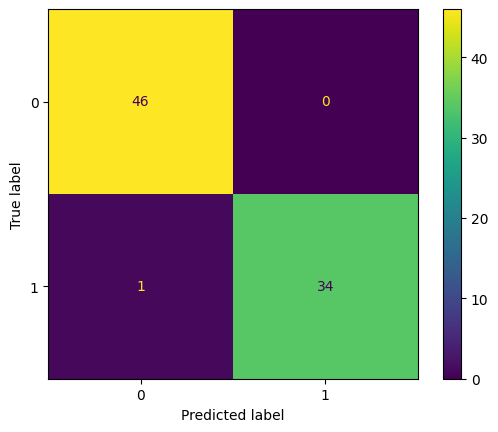

In [53]:
from sklearn import metrics
actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)
confusion_matrix = metrics.confusion_matrix(y_test_smote,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

In [55]:
from sklearn.metrics import recall_score
recall_score(y_test_smote, y_pred)


0.9714285714285714

In [56]:
from sklearn.metrics import precision_score
precision_score(y_test_smote, y_pred)


1.0

In [57]:
from sklearn.metrics import f1_score
f1_score(y_test_smote, y_pred)

0.9855072463768115

In [ ]:
from catboost import CatBoostClassifier
model1 = CatBoostClassifier()
model1.fit(X_train_smote,y_train_smote)
y_pred = model1.predict(X_test_smote)
y_pred_train = model1.predict(X_train_smote)
print(metrics.classification_report(y_test_smote,y_pred,labels=[0,1]))
#print("Training accuracy",metrics.accuracy_score(y_train_smote,y_pred_train))
print("Testing accuracy:",metrics.accuracy_score(y_test_smote,y_pred))

In [ ]:
from sklearn import metrics
actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)
confusion_matrix = metrics.confusion_matrix(y_test_smote,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train_smote,y_train_smote)
y_pred = model.predict(X_test_smote)
y_pred_train = model.predict(X_train_smote)
print(metrics.classification_report(y_test_smote,y_pred,labels=[0,1]))
#print("Training accuracy",metrics.accuracy_score(y_train_smote,y_pred_train))
print("Testing accuracy:",metrics.accuracy_score(y_test_smote,y_pred))

In [ ]:
from sklearn import metrics
actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)
confusion_matrix = metrics.confusion_matrix(y_test_smote,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

In [ ]:
from sklearn.model_selection import KFold
folds = KFold(n_splits=10)
folds.get_n_splits(X)
def get_score(model):
  for train_index, test_index in folds.split(X):
    model.fit(X_train_smote, y_train_smote)
    return model.score(X_test_smote,y_test_smote)


In [ ]:
#final_data = pd.DataFrame({'Models': ['RFC','XGB','LGB','DT','CB','ADB'], 'Accuracy' : [get_score(RandomForestClassifier(n_estimators=200,min_samples_split=10,min_samples_leaf=1,max_features='log2',max_depth=15,bootstrap=False))*100,get_score(XGBClassifier())*100,get_score(lgb.LGBMClassifier())*100,get_score(DecisionTreeClassifier())*100,get_score(CatBoostClassifier())*100,get_score(AdaBoostClassifier())*100]})
final_data = pd.DataFrame({'Models': ['RFC','LGB','CB','ADB'], 'Accuracy' : [get_score(RandomForestClassifier(n_estimators=200,min_samples_split=10,min_samples_leaf=1,max_features='log2',max_depth=15,bootstrap=False))*100,get_score(lgb.LGBMClassifier())*100,get_score(CatBoostClassifier())*100,get_score(AdaBoostClassifier())*100]})
final_data

In [ ]:
sns.barplot(x = final_data['Models'],y = final_data['Accuracy'])

In [ ]:
import pickle

In [ ]:
filename = 'liver_model.sav'
pickle.dump(model1,open(filename,'wb'))

In [ ]:
loaded_model = pickle.load(open('liver_model.sav','rb'))